* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
* It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.
* **Source:** https://machinelearningmastery.com/k-fold-cross-validation/

In [1]:
# Import modules
from google.colab import files
import matplotlib.pyplot as plt
from functools import *
import re  # For removing letter in string 
import operator  # For sorting dictionary
import random
import math
import seaborn as sns
import pandas as pd
import numpy as np
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TensorFlow 1.x selected.


# **Import and Setup**

In [2]:
uploaded = files.upload()
file_name = "heart.csv"

Saving heart.csv to heart.csv


In [3]:
dataset = pd.read_csv(file_name, delimiter=',')
print(dataset.shape)
dataset.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values

In [0]:
# Model Evaluation
def model_evaluation_classification(xvalid, yvalid, model):
    prediction = model.predict(xvalid)
    accuracy = accuracy_score(yvalid, prediction.round()) * 100.0
    precision = precision_score(yvalid, prediction.round(), average='micro') * 100.0
    recall = recall_score(yvalid, prediction.round(), average='micro') * 100.0
    f1score = f1_score(yvalid, prediction.round(), average='micro')

    print("Accuracy: %.2f%%" % (accuracy))
    print("Precision: %.2f%%" % (precision))
    print("Recall: %.2f%%" % (recall))
    print("F1-score: %.2f\n" % (f1score))

def model_evaluation_regression(xvalid, yvalid, model):
    prediction = model.predict(xvalid)
    mae = mean_absolute_error(yvalid, prediction)
    print("MAE: %.2f\n" % (mae))

# **Cross-Validation**

### Binary Classification

In [6]:
X = dataset.drop('sex', axis='columns').values
Y = dataset['sex'].values

# Define 5 folds, returns the number of splitting iterations in the cross-validator
kf = KFold(n_splits = 5)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [7]:
KFold(n_splits=5, random_state=None, shuffle=False)

classification_dataset_labels = []
classification_dataset_acc = []
fold = 1
for train_indices, valid_indices in kf.split(X):
    print('')
    print('Fold:', fold)
    fold += 1
    print('TRAIN:')
    print(train_indices.shape)
    print(train_indices) 
    print('VALID:')
    print(valid_indices.shape)
    print(valid_indices)
    XTRAIN, XVALID = X[train_indices], X[valid_indices]
    YTRAIN, YVALID = Y[train_indices], Y[valid_indices] 

    ## Setting up callback
    hdf5_file = "classification.hdf5"
    callback_a = ModelCheckpoint(filepath = hdf5_file, monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

    ## Model creation, complie, and fit
    model = Sequential()
    model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1024, batch_size=30, callbacks = [callback_a, callback_b], verbose=0)

    ## Get Prediction
    model.load_weights(hdf5_file)
    prediction = model.predict(XVALID)
    acc_score = accuracy_score(YVALID, prediction.round())

    ## Save Result
    print("ACC: %.2f" % acc_score)
    classification_dataset_labels.append("Fold #%s" % fold)
    classification_dataset_acc.append(acc_score)


Fold: 1
TRAIN:
(242,)
[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301

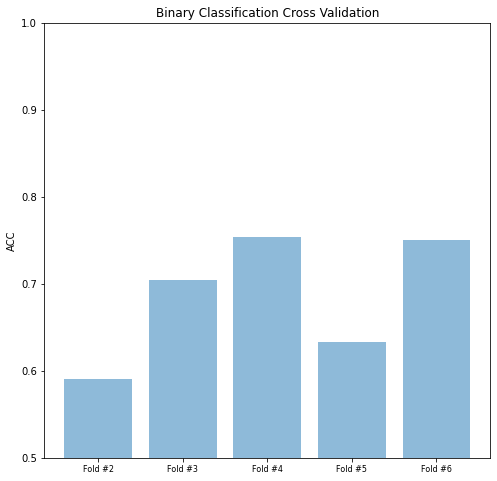

In [8]:
y_pos = np.arange(len(classification_dataset_labels))

plt.figure(figsize=(8, 8))
plt.bar(y_pos, classification_dataset_acc, align='center', alpha=0.5)
plt.xticks(y_pos, classification_dataset_labels, fontsize=8)
plt.ylabel('ACC')
plt.ylim(0.5, 1)
plt.title('Binary Classification Cross Validation')

plt.show()

In [9]:
print("|FOLD # |  ACC  |")
for index, acc in enumerate(classification_dataset_acc):
  print("Fold #" + str(index) + " ACC: " + str(acc))

|FOLD # |  ACC  |
Fold #0 ACC: 0.5901639344262295
Fold #1 ACC: 0.7049180327868853
Fold #2 ACC: 0.7540983606557377
Fold #3 ACC: 0.6333333333333333
Fold #4 ACC: 0.75


### Regression

In [10]:
X = dataset.drop('age', axis='columns').values
Y = dataset['age'].values

# Define 5 folds, returns the number of splitting iterations in the cross-validator
kf = KFold(n_splits = 5)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [11]:
KFold(n_splits=5, random_state=None, shuffle=False)

regression_dataset_labels = []
regression_dataset_mae = []
fold = 1
for train_indices, valid_indices in kf.split(X):
    print('')
    print('Fold:', fold)
    fold += 1
    print('TRAIN:')
    print(train_indices.shape)
    print(train_indices) 
    print('VALID:')
    print(valid_indices.shape)
    print(valid_indices)
    XTRAIN, XVALID = X[train_indices], X[valid_indices]
    YTRAIN, YVALID = Y[train_indices], Y[valid_indices] 

    ## Setting up callback
    hdf5_file = "regression.hdf5"
    callback_a = ModelCheckpoint(filepath = hdf5_file, monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

    ## Model creation, complie, and fit
    model = Sequential()
    model.add(Dense(13, input_dim=len(XTRAIN[0, :]), activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
    history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1024, batch_size=30, callbacks = [callback_a, callback_b], verbose=0)

    ## Get Prediction
    model.load_weights(hdf5_file)
    prediction = model.predict(XVALID)
    acc_score = mean_absolute_error(YVALID, prediction.round())

    ## Save Result
    print("MAE: %.2f" % acc_score)
    regression_dataset_labels.append("Fold #%s" % fold)
    regression_dataset_mae.append(acc_score)


Fold: 1
TRAIN:
(242,)
[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301

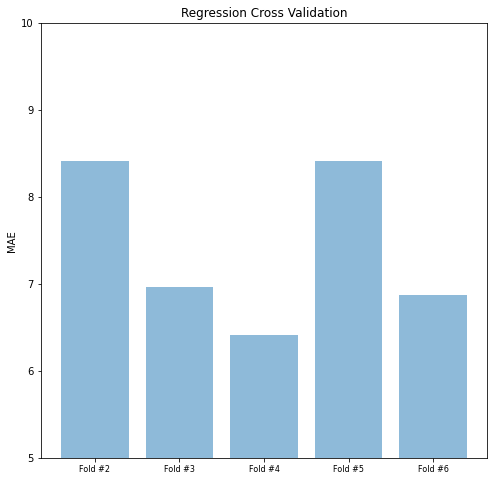

In [14]:
y_pos = np.arange(len(regression_dataset_labels))

plt.figure(figsize=(8, 8))
plt.bar(y_pos, regression_dataset_mae, align='center', alpha=0.5)
plt.xticks(y_pos, regression_dataset_labels, fontsize=8)
plt.ylabel('MAE')
plt.ylim(5, 10)
plt.title('Regression Cross Validation')

plt.show()

In [13]:
print("|FOLD # |  MAE  |")
for index, mae in enumerate(regression_dataset_mae):
  print("Fold #" + str(index) + " MAE: " + str(mae))

|FOLD # |  MAE  |
Fold #0 MAE: 8.40983606557377
Fold #1 MAE: 6.967213114754099
Fold #2 MAE: 6.409836065573771
Fold #3 MAE: 8.416666666666666
Fold #4 MAE: 6.866666666666666
